In [22]:
### till now-->> 1:56:00 mins (11 lectures)

### plan -->> 2:20-2:30 mins (14 lectures) (ie approx 14 lectures of 10 mins each)



#### for pipeline-->> https://www.kaggle.com/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
df=pd.read_csv(r'G:\EDA_projects\Hotel_booking/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [25]:
df.shape

(119390, 32)

# 1.. lets perform data cleaning..


In [26]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [27]:
# Replace missing values:

# agent: If no agency is given, booking was most likely 
# made without one.

# company: If none given, it was most likely private.
# rest schould be self-explanatory.

In [ ]:
### most of the missing values of company feature are 
#    missing ,so lets drop that..

## company-  ID of the company/entity that made the 
#            booking or responsible for paying the booking.

df['company'].isna().sum()/df.shape[0] *100


In [29]:
## agent - -ID of the travel agency that made the booking

df['agent'].unique()

## we can think of deleting this feature bcz this feature will 
# not impact my analysis or to my model..

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [201]:
df.drop(['agent','company'],axis=1,inplace=True)

In [31]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [32]:
### filling missing values of country with mode..

In [33]:
df['country'].value_counts()[0]

48590

In [202]:
df['country'].fillna(df['country'].value_counts()[0],\
                     inplace=True)

In [35]:
df['country'].isnull().sum()

0

In [203]:
df.fillna(0,inplace=True)

In [204]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [38]:
'''
def data_clean(df):
    df.fillna(0,inplace=True)
    print(df.isnull().sum())

'''

'\ndef data_clean(df):\n    df.fillna(0,inplace=True)\n    print(df.isnull().sum())\n\n'

In [39]:
### lets clean data  ,

In [40]:
### seems to have some dirtiness in data as Adults,babies & 
#   children cant be zero at a same time ..

### bcz if count is 0 ,then how is booking possible ??

In [41]:
list1=['children','adults','babies']

for i in list1:
    print('{} has unique values as {}'.format(i,df[i].\
                                              unique()))

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


In [42]:
### seems to have some dirtiness in data 

In [43]:
filter1=(df['children']==0) & (df['adults']==0) & \
                           (df['babies']==0)
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [44]:
### Visualise Entire Dataframe where adult,children & 
#    babies are 0

In [45]:
pd.set_option('display.max_columns',32)

In [205]:
filter1=(df['children']==0) & (df['adults']==0) & \
                            (df['babies']==0)
df[filter1]
                            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [206]:
data=df[~filter1]

In [207]:
data.shape

(119210, 30)

In [49]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [208]:
data.duplicated().sum()
## 32006


## since rows can be duplicated bcz at a time ,more number of customers can do check-in ,but unfortunately since 
## we do not have IDs of the passenger so lets continue..

32006

# 2.. Where do the guests come from?
    Lets perform Spatial Analysis

In [50]:
data[data['is_canceled']==0]['country'].value_counts()

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
DMA        1
MDG        1
KIR        1
DJI        1
SLE        1
Name: country, Length: 166, dtype: int64

In [51]:
data[data['is_canceled']==0]['country'].value_counts()
                /len(data[data['is_canceled']==0])

PRT    0.279652
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
DMA    0.000013
MDG    0.000013
KIR    0.000013
DJI    0.000013
SLE    0.000013
Name: country, Length: 166, dtype: float64

In [52]:
'''
The above gives information about the location which bookings made in. 
According to that, there is an apparent difference in booking 
       location between Portugal ,Great Britain and the others.
Approx. 28% of all bookings made in the same location: Portugal.

'''

'\nThe above gives information about the location which bookings made in. \nAccording to that, there is an apparent difference in booking location between Portugal ,Great Britain and the others.\nApprox. 28% of all bookings made in the same location: Portugal.\n\n'

In [53]:
country_wise_data=data[data['is_canceled']==0]['country'].\
                            value_counts().reset_index()
country_wise_data.columns=['country','No of guests']
country_wise_data

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,DMA,1
162,MDG,1
163,KIR,1
164,DJI,1


In [54]:
### we can also show-case above stuffs via bar chart ,line 
# chart but lets visualise using map so that it looks more interactive..

In [55]:
import folium

In [56]:
basemap=folium.Map()

In [57]:
country_wise_data.dtypes

country         object
No of guests     int64
dtype: object

In [ ]:
# plotly packages
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [58]:
import plotly.express as px

In [ ]:
# show on map
map_guest = px.choropleth(country_wise_data,
            locations=country_wise_data['country'],
            color=country_wise_data['No of guests'], 
            hover_name=country_wise_data['country'], 
            title="Home country of guests")
map_guest.show()

#### People from all over the world are staying in these two hotels. 
   Most guests are from Portugal and other countries in Europe

# 3..How much do guests pay for a room per night?

In [60]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


#### Both hotels have different room types and different meal 
     arrangements. Seasonal factors are also important. 
     So the prices vary a lot. Since no currency information is given, 
     but Portugal is part of the European Monetary Union, 
     I assume that all prices are in EUR.

In [61]:
data2=data[data['is_canceled']==0]

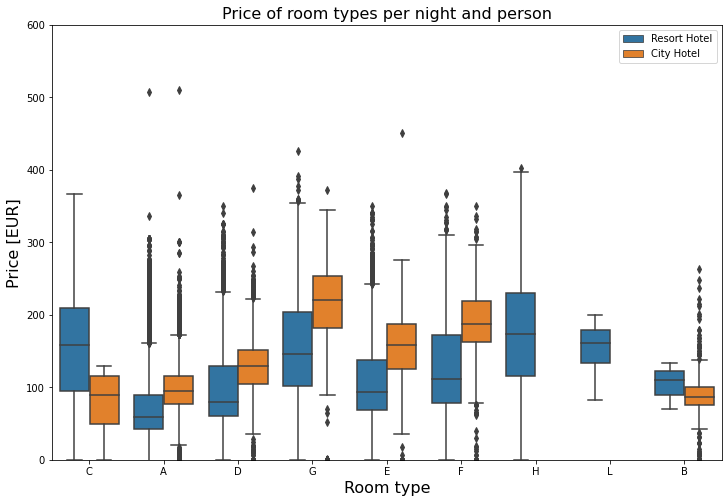

In [62]:
# boxplot:
plt.figure(figsize=(12, 8))

sns.boxplot(x="reserved_room_type",
            y="adr",
            hue="hotel",
            data=data2)

plt.title("Price of room types per night \
                and person", fontsize=16)

plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 600)
plt.show()

    Conclusion-->>,  This figure shows the average price per room, 
                depending on its type and the standard deviation. 
                Note that due to data anonymization rooms with the 
                same type letter may not necessarily be the same 
                across hotels.

# 4..Which are the most busy month 
        or in which months Guests are high?

In [63]:
data_resort = data[(data["hotel"] == "Resort Hotel") \
                   & (data["is_canceled"] == 0)]

data_city = data[(data["hotel"] == "City Hotel") \
                 & (data["is_canceled"] == 0)]

In [64]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [65]:
rush_resort=data_resort['arrival_date_month'].\
                    value_counts().reset_index()

rush_resort.columns=['month','no of guests']
rush_resort

,month,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [66]:
rush_city=data_city['arrival_date_month'].\
                value_counts().reset_index()

rush_city.columns=['month','no of guests']
rush_city

,month,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [67]:
final_rush=rush_resort.merge(rush_city,on='month')

final_rush.columns=['month','no of guests in resort',\
                    'no of guest in city hotel']
final_rush

,month,no of guests in resort,no of guest in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


#### now we will observe over here is month column 
    is not in order, & if we will visualise we will 
    get improper conclusion
#### so very first we have to provide right hierarchy to the month column

In [68]:
## !pip install sort-dataframeby-monthorweek

## Dependency package needs to be installed
## !pip install sorted-months-weekdays

In [69]:
import sort_dataframeby_monthorweek as sd

In [70]:
def sort_data(df,colname):
    return sd.Sort_Dataframeby_Month(df,colname)


In [71]:
final_rush=sort_data(final_rush,'month')
final_rush

,month,no of guests in resort,no of guest in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [72]:
final_rush.dtypes

month                        object
no of guests in resort        int64
no of guest in city hotel     int64
dtype: object

In [73]:
final_rush.columns

Index(['month', 'no of guests in resort', 'no of guest in city hotel'], dtype='object')

In [ ]:
px.line(data_frame=final_rush, x='month', \
        y=['no of guests in resort',\
           'no of guest in city hotel'],\
        title='Total no of guests per Months')

In [75]:
## We can try with Matplotlib code  , as seaborn 
## lineplot will give us some wrong results.. 

## just bcz of Input data variables(x) inside 
## lineplot of seaborn(sns.lineplot()) must be numeric ..



### Conclusion
     The City hotel has more guests during spring and autumn, 
     when the prices are also highest.
    In July and August there are less visitors, 
    although prices are lower.

    Guest numbers for the Resort hotel go down slighty from 
    June to September, which is also when the prices are highest.
    Both hotels have the fewest guests during the winter.
    
    
    or
    
    '''
    from this we can say, August is the most intense month of bookings
    ie rush months are  August, July, and September,
'''

# 5.. which month has highest adr(avg daily rate)
    adr- avg daily price of a room !
    ie , arrival_month vs adr  , hence we can consider 
          bar & box for such !

In [76]:
### ie , arrival_month vs adr  , hence we can consider 
#        bar & box for such !
'''
Another exploratory analysis made for diving deep into the 
relationship between ADR and arrival month and booking 
cancellation status

'''

'\nAnother exploratory analysis made for diving deep into the relationship between ADR and arrival month and booking cancellation\nstatus\n\n'

In [77]:
'''
returns non.structural analysis.. 
bcz by-default in data ,months are not in hierarchy..

sns.barplot(x='arrival_date_month', y='adr',\
             hue='is_canceled',  data=data)

'''

"\nreturns non.structural analysis.. bcz by-default in data ,months are not in hierarchy..\nsns.barplot(x='arrival_date_month', y='adr', hue='is_canceled',  data=data)\n\n"

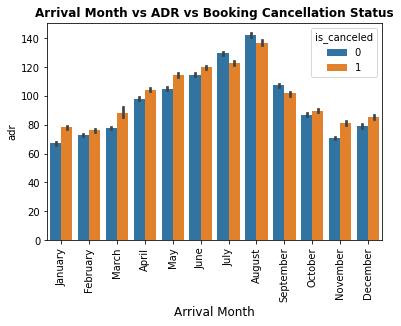

In [78]:
sns.barplot(x='arrival_date_month', y='adr',\
            hue='is_canceled',  \
        data=sort_data(data,'arrival_date_month'))

plt.title('Arrival Month vs ADR vs Booking Cancellation \
                        Status', weight='bold')

plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation='vertical')

## in case if u want to disable the text output..
plt.show()

### note-->> On y-axis ,it typically consider avg 
#            adr for each of the month ,
#  as by-default estimator=<function mean at 0x00000184B75074C0>

In [79]:
### is_canceled-->> Value indicating if the booking 
        #          was canceled (1) or not (0)

In [80]:
'''
canceled bookings have higher ADR than not canceled bookings ,
Maybe this higher adr could be one of the reasons for 
                                  canceled bookings.

'''

'\ncanceled bookings have higher ADR than not canceled bookings ,\nMaybe this higher adr could be one of the reasons for canceled bookings.\n\n'

In [81]:
'''
## we can also think of using boxplot..
plt.figure(figsize=(12, 8))
sns.boxplot(x="arrival_date_month",
            y="adr",
            hue="is_canceled",
            data=sort_data(data,'arrival_date_month'))
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.ylim(0, 600)
plt.show()

'''

'\n## we can also think of using boxplot..\nplt.figure(figsize=(12, 8))\nsns.boxplot(x="arrival_date_month",\n            y="adr",\n            hue="is_canceled",\n            data=sort_data(data,\'arrival_date_month\'))\nplt.title("Price of room types per night and person", fontsize=16)\nplt.xlabel("Room type", fontsize=16)\nplt.ylabel("Price [EUR]", fontsize=16)\nplt.ylim(0, 600)\nplt.show()\n\n'

# 6.. Lets analyse whether bookings were made only for weekdays or for weekends or for both ??
    
    But there is no such feature that will directly tell us this , 
       it means first & foremost we have to create this !

In [82]:
'''

Another important features which are related to time are 
stays_in_week_nights and stays_in_weekend_night features. 

The below table shows the relationship between these two 
features. According to that, there is some missing data.

645 values are inputted zero both weekend and weeknights. 
However, this missing data is small enough to neglect.

'''

'\n\nAnother important features which are related to time are stays_in_week_nights and stays_in_weekend_night features. \nThe below table shows the relationship between these two features. According to that, there is some missing data.\n645 values are inputted zero both weekend and weeknights. However, this missing data is small enough to neglect.\n\n'

In [83]:
'''
stays_in_weekend_nights =>> Number of weekend nights 
                     (Saturday or Sunday) the guest 
                     stayed or booked to stay at the hotel
                     
stays_in_week_nights =>> Number of week nights (Monday to Friday) 
                  the guest stayed or booked to stay at the hotel
'''

'\nstays_in_weekend_nights =>> Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel\nstays_in_week_nights =>> Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel\n'

In [84]:
# Table of `stay_in_weekend` and `stay_in_week_nights` features

pd.crosstab(index = data['stays_in_week_nights'],\
            columns=data['stays_in_weekend_nights'],\
            margins=True)


stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19,All
stays_in_week_nights,,,,,,,,,,,,,,,,,,
0,645,4569,2358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7572
1,16436,7325,6531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30292
2,17949,8976,6745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33670
3,11557,6150,4534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22241
4,4478,2407,2658,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9543
5,830,1188,8648,308,94,0,0,0,0,0,0,0,0,0,0,0,0,11068
6,0,0,847,300,347,0,0,0,0,0,0,0,0,0,0,0,0,1494
7,0,0,446,397,181,0,0,0,0,0,0,0,0,0,0,0,0,1024
8,0,0,391,131,132,0,0,0,0,0,0,0,0,0,0,0,0,654


In [85]:
len(data[(data['stays_in_week_nights']==0) & \
         (data['stays_in_weekend_nights']==0)])

## These 645 values which are not assigned any feature, indicated as undefined_data...

645

In [86]:
data[(data['stays_in_week_nights']==0) & \
     (data['stays_in_weekend_nights']==0)].head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015


In [87]:
'''
Hence  ,The above table brings an idea about creating a new feature. 
Which is indicated just_stay_weekend, 
just_stay_weekday and stay_both_weekday_and_weekday.

'''

'\nHence  ,The above table brings an idea about creating a new feature. \nWhich is indicated just_stay_weekend, just_stay_weekday and stay_both_weekday_and_weekday.\n\n'

In [88]:
data2=data.copy()

In [89]:
def week_function(row):
    
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2] == 0 and row[feature1] > 0:
        return 'stay_just_weekend'
    elif row[feature2] > 0 and row[feature1] == 0:
        return 'stay_just_weekday'
    elif row[feature2] > 0 and row[feature1] > 0:
        return 'stay_both_weekday_and_weekend'
    else:
        return 'undefined_data'

In [90]:
from warnings import filterwarnings
filterwarnings('ignore')

In [91]:
data2['weekend_or_weekday']=data2.apply\
                    (func=week_function,axis=1)

In [92]:
data2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data


In [93]:
data2['weekend_or_weekday'].value_counts()

## most of the bookings are both for 
#   stay_both_weekday_and_weekend

stay_both_weekday_and_weekend    60388
stay_just_weekday                51250
stay_just_weekend                 6927
undefined_data                     645
Name: weekend_or_weekday, dtype: int64

In [94]:
group_data=data2.groupby([ 'arrival_date_month',\
                          'weekend_or_weekday']).\
                            size().unstack()
group_data

weekend_or_weekday,stay_both_weekday_and_weekend,stay_just_weekday,stay_just_weekend,undefined_data
arrival_date_month,,,,
April,6024,4420,601,33
August,7945,5221,646,49
December,3128,3189,372,70
February,3669,3796,533,54
January,2339,3075,457,50
July,7437,4528,621,58
June,5395,4942,554,38
March,4705,4512,499,52
May,5719,5197,788,76


In [95]:
### again month feature is not in a right hierarchy ,
#   & if we will visualise this,  we might not get proper conclusion !

In [96]:
group_data_sorted=sort_data(group_data.reset_index(),\
                            'arrival_date_month')

In [97]:
group_data_sorted.set_index('arrival_date_month',\
                            inplace=True)

In [98]:
group_data_sorted

,stay_both_weekday_and_weekend,stay_just_weekday,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,2339,3075,457,50
February,3669,3796,533,54
March,4705,4512,499,52
April,6024,4420,601,33
May,5719,5197,788,76
June,5395,4942,554,38
July,7437,4528,621,58
August,7945,5221,646,49
September,5294,4531,652,23


Text(0, 0.5, 'Count')

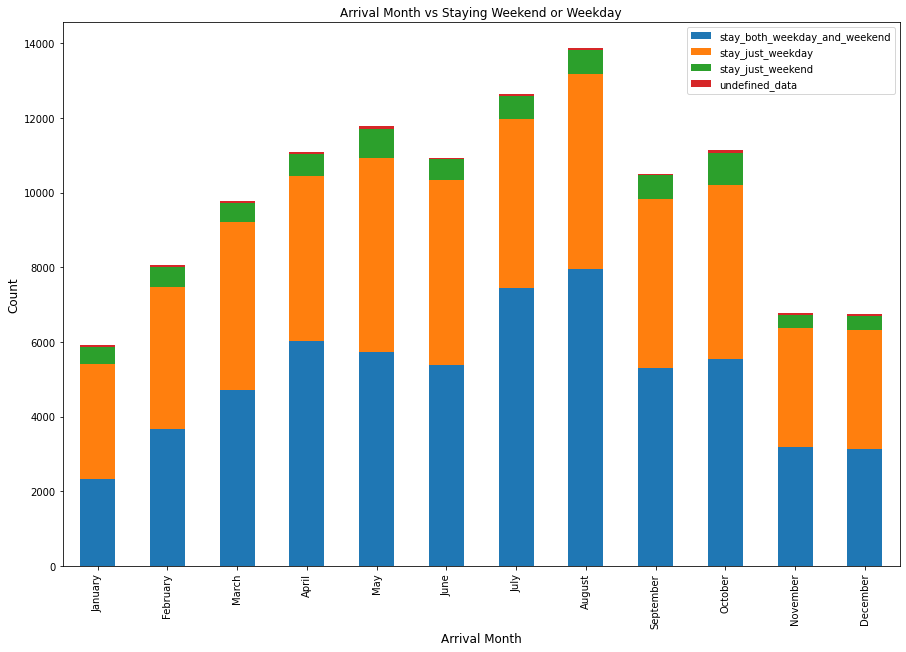

In [99]:
group_data_sorted.plot(kind='bar',stacked=True,figsize=(15,10))

plt.title('Arrival Month vs Staying Weekend or Weekday')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [100]:
'''

above bar graph shows that most bookings were made to stay
only for weekdays or both weekdays & weekends. 
& there is not significant change in the trend !

'''

'\n\nabove bar graph shows that most bookings were made to stay only for weekdays or both weekdays & weekends. \n& there is not significant change in the trend !\n\n'

# 7.. How to create some more features ..

    We should check the features to create some more meaningful variables and reduce the number of features if it is 
        possible.

        1) We can think of a adults,children,babies as a family feature ,ie wherever they exists ,
            we can treat it as a family..
            
        2) Wherever 'deposit_type' == 'No Deposit' & 'deposit_type' == 'Refundable' , 
            we can say deposit does not exist there ,else deposit exist there..

In [101]:
## 1 basically means at that particular instance ,we have a family !
## 0 basically means at that particular instance ,we do not have a family !

## For a family , it must have adults & (either children or babies or both(children,adults)).. 
def family(row):
    if (row['adults'] > 0) & (row['children'] > 0 or row['babies'] > 0):
        return 1
    else:
        return 0

In [102]:
data["is_family"] = data.apply(family, axis = 1)

In [103]:
data["total_customer"] = data["adults"] + data["children"] + data["babies"]

In [104]:
'''
def deposit(row):
    if ((row['deposit_type'] == 'No Deposit') | (row['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1
data["deposit_given"] = data.apply(deposit, axis=1)

'''

'\ndef deposit(row):\n    if ((row[\'deposit_type\'] == \'No Deposit\') | (row[\'deposit_type\'] == \'Refundable\')):\n        return 0\n    else:\n        return 1\ndata["deposit_given"] = data.apply(deposit, axis=1)\n\n'

In [105]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [106]:
dict1={'No Deposit':0, 'Refundable':0, 'Non Refund':1}

In [107]:
data['deposit_given']=data['deposit_type'].map(dict1)

In [108]:
data["total_nights"] = data["stays_in_weekend_nights"]+ data["stays_in_week_nights"]

In [109]:
data['reservation_status_date']

0         7/1/2015
1         7/1/2015
2         7/2/2015
3         7/2/2015
4         7/3/2015
            ...   
119385    9/6/2017
119386    9/7/2017
119387    9/7/2017
119388    9/7/2017
119389    9/7/2017
Name: reservation_status_date, Length: 119210, dtype: object

In [110]:
# Information of these columns is also inside of new features, so it is better to drop them.

# I did not drop stays_nights features, I can't decide which feature is more important there.

data = data.drop(columns = ['adults', 'babies', 'children', 'deposit_type'])

In [111]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,deposit_given,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0,0


# 8.. how to apply Feature encoding on data..


 as most of the ml algos will not work well with categorical hence we have to convert it into numerical ones !
 
 ->> lets think which encoding technique will work best in such cases !

    if there is no order ,ie nominal data ,we can think of One-hot ,but it is not good to use  one-hot if that feature has so 
    many sub-categories as it will cerate curse of dimensionality ,ie it creates morefeatures !
    
    if there is an order ,its good to use Label-Encoder !

    if we look at the distribution of the categorical feature, we see that it is completely random,no correlation whatsoever      with the target variable. ,its good to use Mean encoding !

https://towardsdatascience.com/why-you-should-try-mean-encoding-17057262cd0
   
    What mean encoding does is->> it solves both the encoding task and also creates a feature that is more representative of the target variable —





In [112]:
cat_features=[col for col in data.columns if data[col].dtype=='object']
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [113]:
num_features = [col for col in data.columns if data[col].dtype!='object']
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'deposit_given',
 'total_nights']

In [114]:
for col in cat_features:
    print('Total unique sub-categories in {} are {}'.format(col,data[col].nunique()))
    

Total unique sub-categories in hotel are 2
Total unique sub-categories in arrival_date_month are 12
Total unique sub-categories in meal are 5
Total unique sub-categories in country are 178
Total unique sub-categories in market_segment are 8
Total unique sub-categories in distribution_channel are 5
Total unique sub-categories in reserved_room_type are 9
Total unique sub-categories in assigned_room_type are 11
Total unique sub-categories in customer_type are 4
Total unique sub-categories in reservation_status are 3
Total unique sub-categories in reservation_status_date are 926


In [115]:
## ie for 'arrival_date_month','reserved_room_type', 'assigned_room_type' ,its good to use label encoder !

In [116]:
## for ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel','customer_type', 'reservation_status'] , 
   #  onehot will increase dimensions of data ,so lets use Mean encoding over here !

#### Performing Mean encoding :

    Lets perform mean encoding !

    There are 2 ways to do this :
         -using in-built packages
         -from scratch 


In [117]:
data[data['hotel']=='City Hotel']['is_canceled'].value_counts()

0    46084
1    33079
Name: is_canceled, dtype: int64

In [194]:


data.groupby(['hotel'])['is_canceled'].mean().to_dict()
                  
                  
### ie where-ever 'city_hotel' is available ,replace it with 0.417859
### as mean is below than 0.5(0.417),ie we have more 0 points in 'is_canceled feature' than 1's
## which says that less bookings got can cancelled.. bcz (0 is all about booking doesnt get cancelled)

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [195]:
data_cat=data[cat_features]

In [196]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,7/2/2015
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015


In [197]:
data_cat.shape

(119210, 11)

In [122]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [123]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,7/2/2015
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015


In [198]:
data_cat['cancellation']=data['is_canceled']

In [199]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation'],
      dtype='object')

In [126]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation'],
      dtype='object')

In [127]:
cols=data_cat.columns[0:-1]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [128]:
for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean())
    print('\n')

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64


arrival_date_month
April        0.407835
August       0.377823
December     0.350348
February     0.334451
January      0.305016
July         0.374644
June         0.414860
March        0.322277
May          0.397029
November     0.313100
October      0.380910
September    0.391905
Name: cancellation, dtype: float64


meal
BB           0.374106
FB           0.598997
HB           0.344653
SC           0.374064
Undefined    0.244654
Name: cancellation, dtype: float64


country
48590    0.119247
ABW      0.000000
AGO      0.566298
AIA      0.000000
ALB      0.166667
           ...   
VGB      1.000000
VNM      0.250000
ZAF      0.387500
ZMB      0.500000
ZWE      0.500000
Name: cancellation, Length: 178, dtype: float64


market_segment
Aviation         0.221277
Complementary    0.122253
Corporate        0.187618
Direct           0.153712
Groups           0.611086
Offline TA/TO    0.343313
Online T

In [129]:
for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean().to_dict())
    print('\n')
    

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}


{'April': 0.40783534934103627, 'August': 0.37782266791717767, 'December': 0.35034768456872317, 'February': 0.3344510680576254, 'January': 0.305016044587063, 'July': 0.37464409996836445, 'June': 0.41485954799158203, 'March': 0.32227682227682225, 'May': 0.3970288624787776, 'November': 0.31309998523113275, 'October': 0.38090966179241054, 'September': 0.3919047619047619}


{'BB': 0.3741055553146277, 'FB': 0.5989974937343359, 'HB': 0.3446534790427445, 'SC': 0.3740638923120675, 'Undefined': 0.2446535500427716}


{48590: 0.1192468619246862, 'ABW': 0.0, 'AGO': 0.5662983425414365, 'AIA': 0.0, 'ALB': 0.16666666666666666, 'AND': 0.7142857142857143, 'ARE': 0.8431372549019608, 'ARG': 0.2523364485981308, 'ARM': 0.25, 'ASM': 0.0, 'ATA': 0.0, 'ATF': 0.0, 'AUS': 0.2511737089201878, 'AUT': 0.18210609659540775, 'AZE': 0.5294117647058824, 'BDI': 0.0, 'BEL': 0.20239111870196413, 'BEN': 1.0, 'BFA': 0.0, 'BGD': 0.75, 'BGR': 0.16, 'BHR'

In [130]:
df=data_cat.copy()

In [131]:

for col in cols:
    dict1=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict1)
    

In [132]:
data_cat.head(20)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.374644,0.374106,0.567333,0.153712,0.174868,0.330827,0.188186,0.407864,0,0.800000,0
1,0.277674,0.374644,0.374106,0.567333,0.153712,0.174868,0.330827,0.188186,0.407864,0,0.800000,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0,0.985075,0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0,0.985075,0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0,0.522876,0
5,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0,0.522876,0
6,0.277674,0.374644,0.374106,0.567333,0.153712,0.174868,0.330827,0.188186,0.407864,0,0.522876,0
7,0.277674,0.374644,0.598997,0.567333,0.153712,0.174868,0.330827,0.188186,0.407864,0,0.522876,0
8,0.277674,0.374644,0.374106,0.567333,0.367590,0.410598,0.391567,0.445055,0.407864,1,1.000000,1
9,0.277674,0.374644,0.344653,0.567333,0.343313,0.410598,0.318108,0.251373,0.407864,1,1.000000,1


In [133]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [134]:
dataframe.shape

(119210, 31)

In [135]:
dataframe.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,deposit_given,total_nights
0,0.277674,0.374644,0.374106,0.567333,0.153712,0.174868,0.330827,0.188186,0.407864,0,0.800000,0,0,342,2015,27,1,0,0,0,0,0,3,0,0.0,0,0,0,2.0,0,0
1,0.277674,0.374644,0.374106,0.567333,0.153712,0.174868,0.330827,0.188186,0.407864,0,0.800000,0,0,737,2015,27,1,0,0,0,0,0,4,0,0.0,0,0,0,2.0,0,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0,0.985075,0,0,7,2015,27,1,0,1,0,0,0,0,0,75.0,0,0,0,1.0,0,1
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0,0.985075,0,0,13,2015,27,1,0,1,0,0,0,0,0,75.0,0,0,0,1.0,0,1
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0,0.522876,0,0,14,2015,27,1,0,2,0,0,0,0,0,98.0,0,1,0,2.0,0,2


In [136]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [137]:
dataframe.shape

(119210, 30)

# 9.. Handle Outliers

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

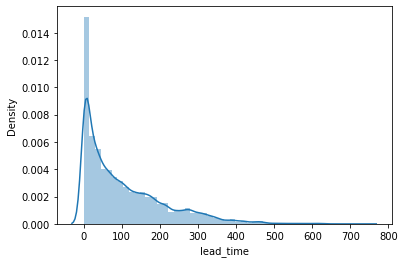

In [138]:
sns.distplot(dataframe['lead_time'])

In [139]:
dataframe[dataframe['lead_time']<=0]['lead_time']

### as we know ln(log base e) of 0 is undefined..
### hence lets use ln(x+1) so that will not undefined or missing value.. 

6         0
18        0
56        0
57        0
58        0
         ..
119137    0
119138    0
119151    0
119166    0
119270    0
Name: lead_time, Length: 6264, dtype: int64

In [140]:
### log1p=log(1 + x)

In [141]:
import numpy as np

def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])


In [142]:
handle_outlier('lead_time')

In [143]:
dataframe['lead_time'].isnull().sum()

0

In [144]:
### since there is no such negative value in our dataframe thats why log gets apply on each & evry observation & hence
### after no undefined value or no missing value come across..

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

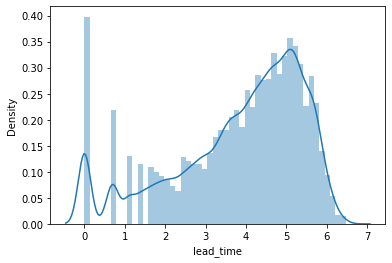

In [145]:
sns.distplot(dataframe['lead_time'].dropna())

## sns.distplot(dataframe['lead_time'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

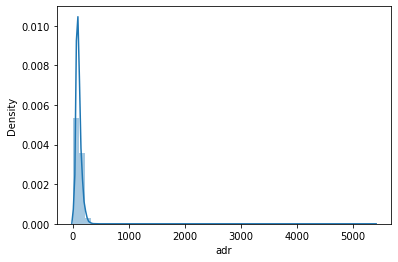

In [146]:
sns.distplot(dataframe['adr'])

In [147]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,deposit_given,total_nights
14969,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0,0.328767,0,5.278115,2017,10,5,4,6,1,0,2,2,0,-6.38,0,0,0,2.0,0,10


In [148]:
### as we know ln(log base e) of negative value(-6.38) is undefined..

### again ,for all the '0' adr , we can think of using ln(x+1) , so that we will note end up getting missing value/undefined value...



In [149]:
handle_outlier('adr')

In [150]:
dataframe['adr'].isna().sum()

1

<AxesSubplot:xlabel='adr', ylabel='Density'>

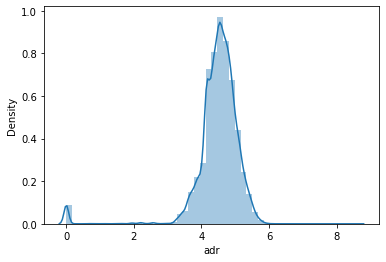

In [151]:
sns.distplot(dataframe['adr'].dropna())

In [152]:
dataframe.dropna(inplace=True)

In [153]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
reservation_status                0
reservation_status_date           0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer              

# 10.. Select important Features using Co-relation & univariate analysis.

#### using univariate analysis..

In [155]:
## let say we have to figure out whether 'lead_time' is not important feature or not in predicting cancellation or not..

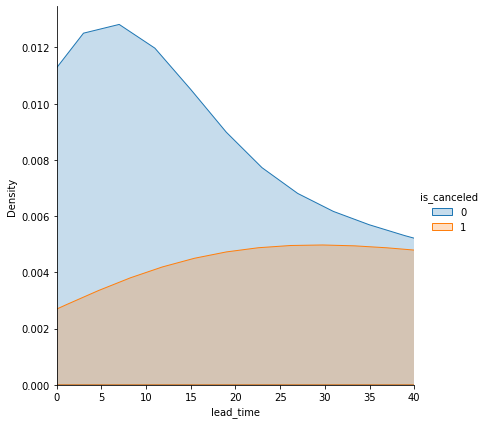

In [156]:
## lets find out whether 'lead_time' is uesful or not..
sns.FacetGrid(data, hue = 'is_canceled',height = 6,xlim = (0,40)).map(sns.kdeplot, 'lead_time', shade = True).add_legend()

In [157]:
### we can say upto some extent , this feature is good , bcz it does not have complete overlapping..

In [158]:
### extremely hard to make sense out of something ,if u have to build a simple model using 1 features (simple if-elif-else)
# then that model will not that much correct !

In [159]:
co_relation=dataframe.corr()
co_relation['is_canceled']

hotel                             0.137075
arrival_date_month                0.069877
meal                              0.050585
country                           0.361979
market_segment                    0.267023
distribution_channel              0.177157
reserved_room_type                0.072773
assigned_room_type                0.201569
customer_type                     0.136608
reservation_status                1.000000
reservation_status_date           0.488307
is_canceled                       1.000000
lead_time                         0.320082
arrival_date_year                 0.016629
arrival_date_week_number          0.008307
arrival_date_day_of_month        -0.005956
stays_in_weekend_nights          -0.001303
stays_in_week_nights              0.025555
is_repeated_guest                -0.083721
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144819
days_in_waiting_list              0.054301
adr        

In [160]:
co_relation['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_given                     0.481506
country                           0.361979
lead_time                         0.320082
market_segment                    0.267023
assigned_room_type                0.201569
distribution_channel              0.177157
hotel                             0.137075
customer_type                     0.136608
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072773
arrival_date_month                0.069877
days_in_waiting_list              0.054301
meal                              0.050585
total_customer                    0.044827
stays_in_week_nights              0.025555
total_nights                      0.018571
arrival_date_year                 0.016629
arrival_date_week_number          0.008307
stays_in_weekend_nights          -0.001303
arrival_dat

    From this list it is apparent that lead_time, total_of_special_requests, required_car_parking_spaces,
    booking_changes ,deposit_given and country are the 5 most important features.
 
    The most important feature to exclude is the "reservation_status":

In [161]:
### reservation_ status feature is drawn more attention because it has higher co-relation value with the is_canceled feature. 
### The below table shows the relationship with details. This high correlation can cause a wrong prediction or overfitting.
### To Prevent this situation, reservation_status feature will be eliminated..

### least performing features are[arrival_date_week_number','arrival_date_year','stays_in_weekend_nights','arrival_date_day_of_month']
    

In [162]:
pd.crosstab(columns = data['reservation_status'], index = data['is_canceled'],
           margins=True, margins_name = 'Total')

reservation_status,Canceled,Check-Out,No-Show,Total
is_canceled,,,,
0,0,75011,0,75011
1,42993,0,1206,44199
Total,42993,75011,1206,119210


In [163]:
features_to_drop=['arrival_date_week_number','arrival_date_year','stays_in_weekend_nights','arrival_date_day_of_month',
                  'reservation_status','reservation_status_date']

In [164]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [165]:
dataframe.shape

(119209, 24)

# 11.. Feature Importance

In [166]:
x=dataframe.drop('is_canceled',axis=1)
y=dataframe['is_canceled']

In [167]:

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [168]:

# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [169]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [170]:
##feature_sel_model.get_support()

In [171]:
## feature_sel_model.get_support()

In [172]:
cols=x.columns 

In [173]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = cols[(feature_sel_model.get_support())]

In [174]:
# let's print some stats
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 23
selected features: 12


In [175]:
selected_feat

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

In [176]:
x=x[selected_feat]

In [177]:
x.shape

(119209, 12)

In [178]:
y.shape

(119209,)

# 12.. Building a ML model

### splitting dataset & model Building

In [179]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=0)

In [180]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [181]:
y_pred=logreg.predict(x_test)

In [182]:
## inside y_pred , we have basically all the predictions in the form of 0's & 1's
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [183]:
from collections import Counter


In [184]:
Counter(y_pred)

Counter({1: 7799, 0: 22004})

In [185]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[17288,  1351],
       [ 4716,  6448]], dtype=int64)

In [186]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score


0.7964298896084286

In [187]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

# 13.. How to cross-validate model..

### Cross validate your model

In [188]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,x,y,cv=10)

In [189]:
score

array([0.78751783, 0.74314235, 0.84162402, 0.74448452, 0.72686855,
       0.78441406, 0.73601208, 0.80563711, 0.79565473, 0.90151007])

In [190]:
score.mean()

0.7866865322545685

# 14.. playing with multiple algos

### Play with multiple Algos

In [191]:
#fit naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [192]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [193]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    # Make predictions.
    predictions = model.predict(x_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[17288  4716]
 [ 1351  6448]]
0.7964298896084286


Naive Bayes
[[ 6627   669]
 [12012 10495]]
0.574505922222595


RandomForest
[[17097  2789]
 [ 1542  8375]]
0.8546790591551187


Decision Tree
[[15973  2728]
 [ 2666  8436]]
0.8190115089084992


KNN
[[16618  3401]
 [ 2021  7763]]
0.8180720061738751


